In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import dependencies

In [2]:
## create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# create a floating point list of random latitudes
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# create a floating point list of random longitudes
lat_lngs = zip(lats, lngs)
# returns an object with both tuples paired together
lat_lngs

In [3]:
coordinates = list(lat_lngs)
# turn the 'lat_lngs' object into a list so that we can use it
coordinates[:10]

[(-4.785664213798128, 152.49061056289855),
 (87.18833752663741, 39.033325405766135),
 (-81.46007836676215, 106.08657863560529),
 (-4.929952676233242, 36.704782224057624),
 (-49.308416727208524, -44.45324569984831),
 (12.917527630395426, 70.4949695033728),
 (-14.527182765839484, 117.94667110962394),
 (-31.748835775958092, -153.16754645609302),
 (-62.66221905055875, 59.07028925625241),
 (-5.220935858551741, 24.589143749258966)]

In [4]:
## now we can use the citipy module to find the nearest cities to the random coordinates in our list

from citipy import citipy
# import citipy module

cities = []
# create a list for holding the cities

# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
    
# print the city count to confirm sufficient count
len(cities)

589

In [5]:
import requests
# import the requests library

from config import weather_api_key
# import the api key from the config file we created

In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=" + weather_api_key
# starting url for weather map api call
print(url)

https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=16d24d2eb2143f2ff1efd161db7f61cb


In [7]:
# create an endpoint URL for a city

city_url = url + "&q=" + "Boston"
# creates endpoint reference for a city
city_weather = requests.get(city_url)
# uses the get() function to return city weather data in json format
city_weather.json()
# prints the data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 301.3,
  'feels_like': 301.09,
  'temp_min': 297.07,
  'temp_max': 303.28,
  'pressure': 1009,
  'humidity': 42},
 'visibility': 10000,
 'wind': {'speed': 4.47, 'deg': 317, 'gust': 10.28},
 'clouds': {'all': 40},
 'dt': 1655156545,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1655111216,
  'sunset': 1655166110},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
boston_data = city_weather.json()
# assigns a variable to json weather data for Boston

In [9]:
boston_data["sys"], boston_data["sys"]["country"], boston_data["dt"]

({'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1655111216,
  'sunset': 1655166110},
 'US',
 1655156545)

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 303.28 42 40 4.47


In [11]:
## this bit will allow us to convert the UTC to ISO format

from datetime import datetime
# import the datetime module
date = boston_data["dt"]
# get the date from the json data
datetime.utcfromtimestamp(date)
# convert utc to date format with year, month, day, hours, minutes, and seconds

datetime.datetime(2022, 6, 13, 21, 42, 25)

In [12]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')
# same function, but with formatting parameters to make it look nice

'2022-06-13 21:42:25'

In [13]:
## this bit will create a list of city urls

import time
# imports time dependency

city_data = []
# create an empty list to hold the weather data
print("Beginning Data Retrieval     ")
print("-----------------------------")
# print the beginning of the logging

record_count = 1
set_count = 1
# create and set counters to 1

for i, city in enumerate(cities):
# loops through all the cities in the list and uses enumerate() to retrieve index and city name

    if (i % 50 == 0 and i >= 50):
    # group cities in sets of 50 for logging purposes
        set_count += 1
        record_count = 1
        time.sleep(10)

    city_url = url + "&q=" + city.replace(" ","+")
    # create endpoint URl for each city

    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # log the url, record, set numbers, and the city
    record_count += 1
    # add 1 to record count
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kokopo
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | kibaya
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | waingapu
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | kabinda
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | tessalit
Processing Record 14 of Set 1 | gweru
Processing Record 15 of Set 1 | almansa
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | dawlatabad
Processing Record 18 of Set 1 | port hedland
Processing Record 19 of Set 1 | margate
Processing Record 20 of Set 1 | new glasgow
Processing Record 21 of Set 1 | kismayo
Processing Record 22 o

Processing Record 39 of Set 4 | tanete
Processing Record 40 of Set 4 | gayeri
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | esperance
Processing Record 44 of Set 4 | nishihara
Processing Record 45 of Set 4 | kirakira
Processing Record 46 of Set 4 | marrakesh
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | shelburne
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | makakilo city
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | emerald
Processing Record 3 of Set 5 | bria
Processing Record 4 of Set 5 | hanyang
Processing Record 5 of Set 5 | lovozero
Processing Record 6 of Set 5 | upernavik
Processing Record 7 of Set 5 | mehamn
Processing Record 8 of Set 5 | raahe
Processing Record 9 of Set 5 | upington
Processing Record 10 of Set 5 | uige
Processing Record 11 of Set 5 | camabatela
Processing Recor

City not found. Skipping...
Processing Record 29 of Set 8 | ouargaye
Processing Record 30 of Set 8 | bajil
Processing Record 31 of Set 8 | puerto colombia
Processing Record 32 of Set 8 | gizo
Processing Record 33 of Set 8 | ust-koksa
Processing Record 34 of Set 8 | banepa
Processing Record 35 of Set 8 | olafsvik
Processing Record 36 of Set 8 | babanusah
City not found. Skipping...
Processing Record 37 of Set 8 | voznesenye
Processing Record 38 of Set 8 | korla
Processing Record 39 of Set 8 | dingle
Processing Record 40 of Set 8 | varberg
Processing Record 41 of Set 8 | el rosario
Processing Record 42 of Set 8 | taos
Processing Record 43 of Set 8 | vestmannaeyjar
Processing Record 44 of Set 8 | manokwari
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | pointe-noire
Processing Record 47 of Set 8 | vrangel
Processing Record 48 of Set 8 | yaan
Processing Record 49 of Set 8 | orguz
Processing Record 50 of Set 8 | leshukonskoye
Processing Record 1 of Set 9 | hami


City not found. Skipping...
Processing Record 21 of Set 12 | pendleton
Processing Record 22 of Set 12 | suluova
Processing Record 23 of Set 12 | inta
Processing Record 24 of Set 12 | okitipupa
Processing Record 25 of Set 12 | japura
Processing Record 26 of Set 12 | bekhteyevka
Processing Record 27 of Set 12 | hammerfest
Processing Record 28 of Set 12 | jalu
Processing Record 29 of Set 12 | muisne
Processing Record 30 of Set 12 | broome
Processing Record 31 of Set 12 | kitami
Processing Record 32 of Set 12 | kununurra
Processing Record 33 of Set 12 | mayo
Processing Record 34 of Set 12 | saint-augustin
Processing Record 35 of Set 12 | kerteh
City not found. Skipping...
Processing Record 36 of Set 12 | ngunguru
Processing Record 37 of Set 12 | sur
Processing Record 38 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 39 of Set 12 | awjilah
-----------------------------
Data Retrieval Complete      
-----------------------------


In [37]:
print(len(city_data))

549


In [15]:
city_data_df = pd.DataFrame(city_data)
# convert the 'city_data' array to a dataframe 
city_data_df.head(10)
# print the first ten rows of the dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kokopo,-4.3520,152.2633,299.48,74,16,1.96,PG,2022-06-13 21:45:58
1,Vardo,70.3705,31.1107,280.14,87,100,2.06,NO,2022-06-13 21:45:59
2,Albany,42.6001,-73.9662,299.85,41,1,1.34,US,2022-06-13 21:45:04
3,Kibaya,-5.3000,36.5667,284.89,92,9,1.91,TZ,2022-06-13 21:46:00
4,Mar Del Plata,-38.0023,-57.5575,288.16,58,0,2.57,AR,2022-06-13 21:46:01
5,Kavaratti,10.5669,72.6420,301.79,75,95,6.04,IN,2022-06-13 21:45:05
6,Waingapu,-9.6567,120.2641,296.49,81,79,3.96,ID,2022-06-13 21:46:02
7,Mataura,-46.1927,168.8643,279.53,93,97,6.17,NZ,2022-06-13 21:44:59
8,Kabinda,-6.1333,24.4833,294.79,48,16,1.41,CD,2022-06-13 21:46:03
9,Vaini,-21.2000,-175.2000,299.24,83,40,2.57,TO,2022-06-13 21:45:01


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", 
                    "Cloudiness", "Wind Speed"]
# create variable with new column order
city_data_df = city_data_df[new_column_order]
# apply to dataframe
city_data_df.head()
# check work

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kokopo,PG,2022-06-13 21:45:58,-4.3520,152.2633,299.48,74,16,1.96
1,Vardo,NO,2022-06-13 21:45:59,70.3705,31.1107,280.14,87,100,2.06
2,Albany,US,2022-06-13 21:45:04,42.6001,-73.9662,299.85,41,1,1.34
3,Kibaya,TZ,2022-06-13 21:46:00,-5.3000,36.5667,284.89,92,9,1.91
4,Mar Del Plata,AR,2022-06-13 21:46:01,-38.0023,-57.5575,288.16,58,0,2.57


In [17]:
output_data_file = "weather_data/cities.csv"
# create the output file (CSV)
city_data_df.to_csv(output_data_file, index_label="City_ID")
# export the city data dataframe into a csv file

In [18]:
## now going to create a scatterplot with some of the data we've organized

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# extract relevant fields from dataframe for plotting

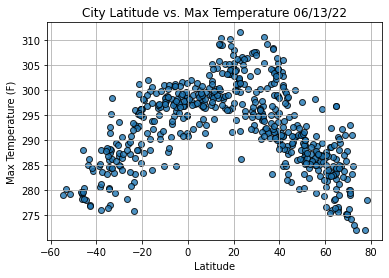

In [19]:
import time
# import time module

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
            # create the scatter plot for latitude vs max temperature

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# incorporate other graph properties

plt.savefig("weather_data/Fig1.png")
# save the figure

plt.show()
# show the plot

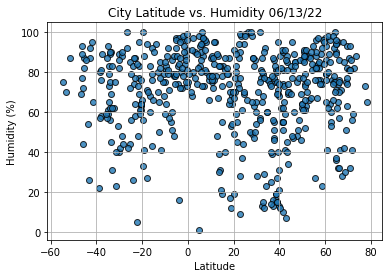

In [20]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
            # build scatter plot for latitude vs humidity

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# incorporate other graph properties

plt.savefig("weather_data/Fig2.png")
# save the figure
plt.show()
# show plot

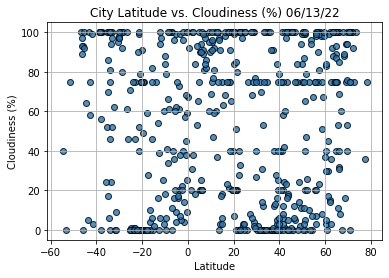

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

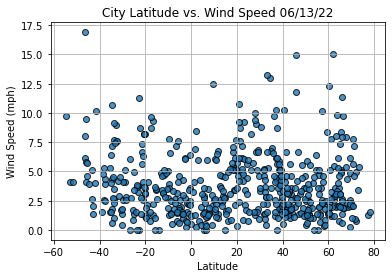

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City               Port Elizabeth
Country                        ZA
Date          2022-06-13 21:44:29
Lat                       -33.918
Lng                       25.5701
Max Temp                   292.65
Humidity                       56
Cloudiness                      0
Wind Speed                   1.03
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
544     True
545     True
546    False
547     True
548     True
Name: Lat, Length: 549, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vardo,NO,2022-06-13 21:45:59,70.3705,31.1107,280.14,87,100,2.06
2,Albany,US,2022-06-13 21:45:04,42.6001,-73.9662,299.85,41,1,1.34
5,Kavaratti,IN,2022-06-13 21:45:05,10.5669,72.6420,301.79,75,95,6.04
10,Tessalit,ML,2022-06-13 21:46:05,20.1986,1.0114,308.11,19,84,5.73
12,Almansa,ES,2022-06-13 21:46:06,38.8692,-1.0971,298.94,27,84,1.78
...,...,...,...,...,...,...,...,...,...
542,Kitami,JP,2022-06-13 21:53:20,43.8031,143.8908,283.22,74,5,1.76
544,Mayo,US,2022-06-13 21:53:21,38.8876,-76.5119,306.58,69,0,5.14
545,Saint-Augustin,CA,2022-06-13 21:53:22,51.2260,-58.6502,289.99,52,65,3.91
547,Sur,OM,2022-06-13 21:53:23,22.5667,59.5289,301.55,77,0,4.77


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vardo,NO,2022-06-13 21:45:59,70.3705,31.1107,280.14,87,100,2.06
2,Albany,US,2022-06-13 21:45:04,42.6001,-73.9662,299.85,41,1,1.34
5,Kavaratti,IN,2022-06-13 21:45:05,10.5669,72.6420,301.79,75,95,6.04
10,Tessalit,ML,2022-06-13 21:46:05,20.1986,1.0114,308.11,19,84,5.73
12,Almansa,ES,2022-06-13 21:46:06,38.8692,-1.0971,298.94,27,84,1.78


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

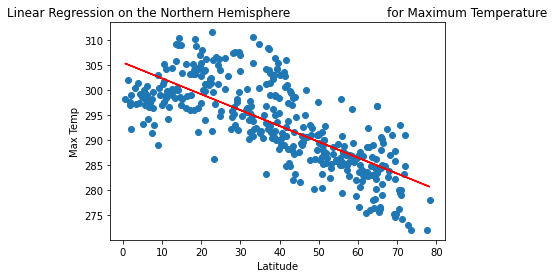

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

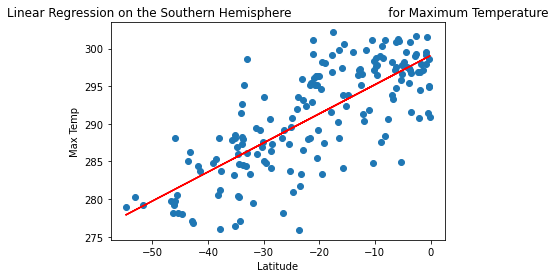

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

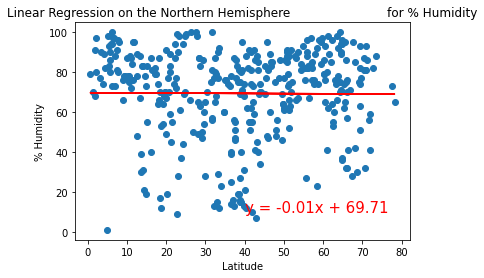

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

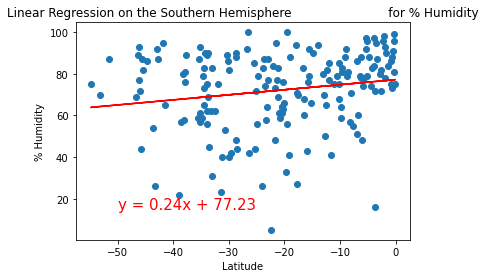

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

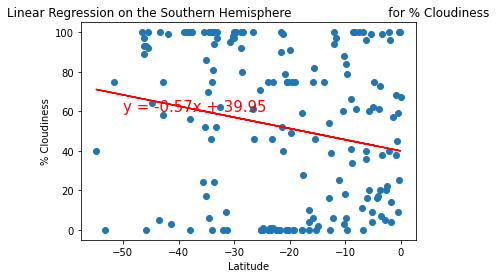

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

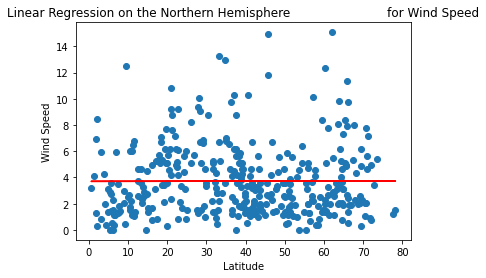

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

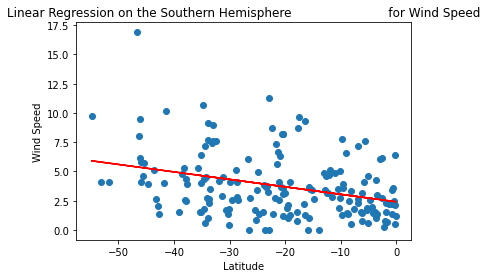

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))